# Introduction to Image Processing

This numerical tour explores some basic image processing tasks.

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [2]:
using NtToolBox
using PyPlot

## Image Loading and Displaying

Several functions are implemented to load and display images.


First we load an image.

path to the images

In [3]:
name = "NtToolBox/src/data/lena.png"
n = 256
M = load_image(name, n);

We can display it. It is possible to zoom on it, extract pixels, etc.

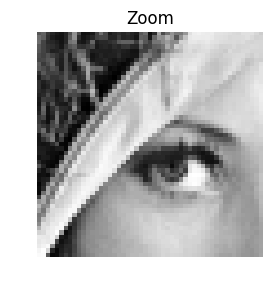

In [5]:
imageplot(M[Int(n/2 - 25) : Int(n/2 + 25), Int(n/2 - 25) : Int(n/2 + 25)], "Zoom", [1, 2, 2]);

## Image Modification

An image is a 2D array, that can be modified as a matrix.

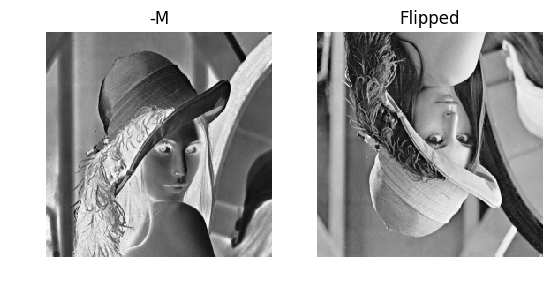

PyObject <matplotlib.text.Text object at 0x000000001BED59E8>

In [4]:
imageplot(-M, "-M", [1,2,1])
imageplot(M[end:-1:1,1:size(M, 2)], "Flipped", [1,2,2])

Blurring is achieved by computing a convolution with a kernel. 

Compute the low pass Gaussian kernel. Warning, the indexes need to be modulo $n$ in order to use FFTs.

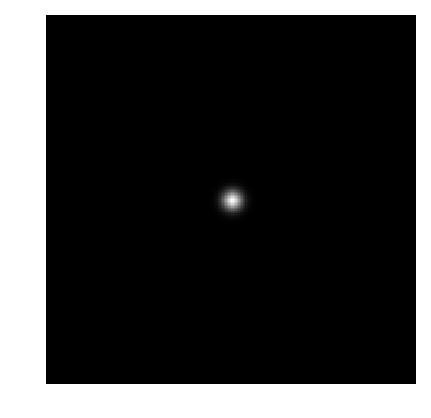

In [5]:
sigma = 5
X = [0:n/2; -n/2:-2]'
Y = [0:n/2; -n/2:-2]
h = exp(-(X.^2 .+ Y.^2)/(2*(sigma)^2))
h = h/sum(h)
imageplot(fftshift(h))

Compute the periodic convolution ussing FFTs

In [6]:
Mh = conv2(Array{Float64, 2}(M), h)
Mh = Mh[1:255, 1:255] + Mh[257:511, 1:255] + Mh[1:255, 257:511] + Mh[257:511, 257:511];

Display

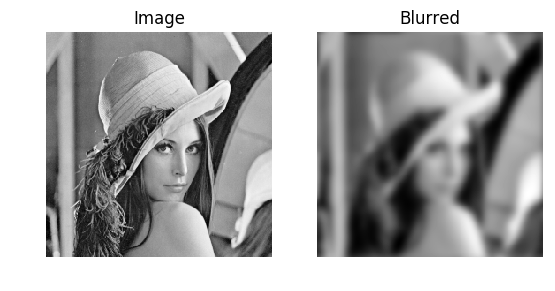

PyObject <matplotlib.text.Text object at 0x000000001C3D5320>

In [7]:
imageplot(M, "Image", [1, 2, 1])
imageplot(Mh, "Blurred", [1, 2, 2])

Several differential and convolution operators are implemented.

 in depwarn(::String, ::Symbol) at .\deprecated.jl:64
 in imgradients(::Array{Float32,2}) at C:\Users\Ayman\.julia\v0.5\ImageFiltering\src\specialty.jl:50
 in include_string(::String, ::String) at .\loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Ayman\.julia\v0.5\IJulia\src\execute_request.jl:157
 in eventloop(::ZMQ.Socket) at C:\Users\Ayman\.julia\v0.5\IJulia\src\eventloop.jl:8
 in 

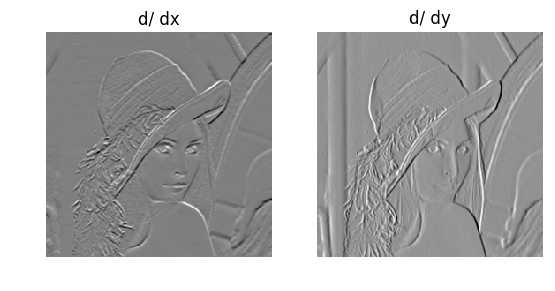

(::IJulia.##13#19)() at .\task.jl:360
while loading In[8], in expression starting on line 1


PyObject <matplotlib.text.Text object at 0x000000001DBAAEF0>

In [8]:
(G_x, G_y) = Images.imgradients(M)
imageplot(G_x, "d/ dx", [1, 2, 1])
imageplot(G_y, "d/ dy", [1, 2, 2])

## Fourier Transform

The 2D Fourier transform can be used to perform low pass approximation
and interpolation (by zero padding).

Compute and display the Fourier transform (display over a log scale).
The function fftshift is useful to put the 0 low frequency in the
middle. After fftshift, the zero frequency is located at position
$(n/2+1,n/2+1)$.

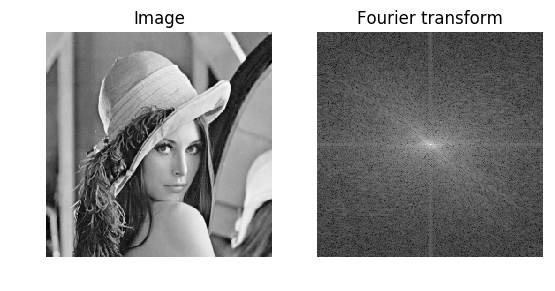

PyObject <matplotlib.text.Text object at 0x000000001DC00208>

In [9]:
Mf = plan_fft(M)
Mf*M 
Lf = fftshift(log(abs(Mf*M) + 1e-1))
imageplot(M, "Image", [1, 2, 1])
imageplot(Lf, "Fourier transform", [1, 2, 2])

**Exercise 1:** To avoid boundary artifacts and estimate really the frequency content of
the image (and not of the artifacts!), one needs to multiply M by a
smooth windowing function h and compute fft2(M*h). Use a sine
windowing function. Can you interpret the resulting filter ?

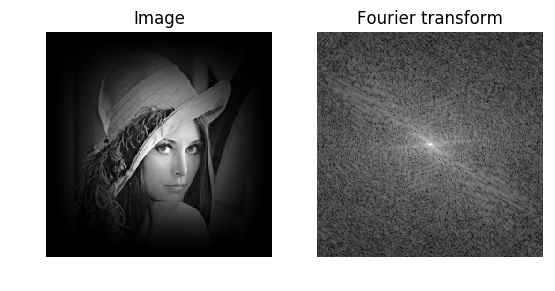

PyObject <matplotlib.text.Text object at 0x000000001DE049B0>

In [10]:
include("NtSolutions/introduction_3_image/exo1.jl")

**Exercise 2:** Perform low pass filtering by removing the high frequencies of the
spectrum. What do you oberve ?

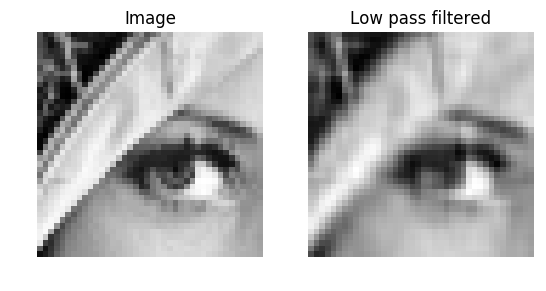

PyObject <matplotlib.text.Text object at 0x000000001E0E8CC0>

In [11]:
include("NtSolutions/introduction_3_image/exo2.jl")